# Setup phase

In [1]:
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn

  Using cached scipy-1.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached numpy-2.1.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (40.8 MB)
Using cached numpy-2.1.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.0 MB)
  Using cached matplotlib-3.9.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-10.4.0-cp312-cp312-manylinux_2_28_x86_64.whl.

# preprocessing of the data

## Loading the data

In [24]:
import numpy as np
import pandas as pd

dataframe = pd.read_csv('anonymized-surveys-numbers.csv')
dataframe.head()

,Id,starting_time,ending_time,language,compilationLanguage,everHeardAboutTarots,tarotKnowledge,tarotUsageFrequency,tarotUseCases,tarotUsageTarget,...,LLM_decisionSupportUsageFrequency,LLM_everGivenUsefulInfoAsDecisionSupport,LLM_decisionSupportTarget,LLM_everChangedDecisionAsDecisionSupport,LLM_trustAgainstOtherInfo,gender,education,nazionalità,statoDiResidenza,cittaDiResidenza
0,1,7/28/2024 11:10,7/28/2024 11:12,Italiano,Italiano,Si,4,2,Per divertimento e passare tempo con gli amici;,"Li utilizzo per gli altri, li leggo io",...,2.0,2.0,Decisioni di studio/educazione;Decisioni lavor...,Si,Del tuo intuito,Maschile,Laurea magistrale,Italiana,Italia,Caltanissetta
1,2,7/29/2024 11:10,7/29/2024 11:12,Italiano,Italiano,Si,3,2,Per divertimento e passare tempo con gli amici;,"Li utilizzo per gli altri, li leggo io",...,2.0,2.0,Decisioni di studio/educazione;Decisioni lavor...,Si,Del tuo intuito,Femminile,Master II livello,Italiana,Italia,Catania
2,3,7/29/2024 11:10,7/29/2024 11:14,Italiano,Italiano,Si,2,2,Per comprendere meglio cio che accade nella mi...,"Li utilizzo per me stesso, li leggo io",...,1.0,0.0,Non chiedo consiglio per prendere decisioni;,No,Del tuo intuito,Femminile,Laurea magistrale,Italiana,Italia,Roma
3,4,7/29/2024 11:18,7/29/2024 11:23,Italiano,Italiano,Si,1,1,Per divertimento e passare tempo con gli amici;,"Li utilizzo per me stesso, me li faccio legger...",...,2.0,2.0,Decisioni di studio/educazione;Decisioni lavor...,No,Del tuo intuito,Maschile,Laurea magistrale,Italiana,Italia,Mascalucia
4,5,7/29/2024 11:27,7/29/2024 11:32,English (United Kingdom)?,Italiano,Si,1,0,Per divertimento e passare tempo con gli amici;,"Li utilizzo per me stesso, li leggo io",...,1.0,1.0,Decisioni di studio/educazione;,No,Del tuo intuito,Maschile,Master I livello,Italiana,Italia,Aci Catena


In [25]:
dataframe.columns

Index(['Id', 'starting_time', 'ending_time', 'language', 'compilationLanguage',
       'everHeardAboutTarots', 'tarotKnowledge', 'tarotUsageFrequency',
       'tarotUseCases', 'tarotUsageTarget', 'tarotConsultation', 'tarotTrust',
       'tarotFuturePredictionTrust', 'tarotDecisionSupport',
       'tarotDecisionSupportFrequency', 'tarotSubjects', 'tarotInfluence',
       'tarotDecisionSupportTrust', 'tarotModifyDecision',
       'tarotImportanceOverOtherSources', 'tarotContradictionFrequency',
       'tarotTrustMore', 'randomNumber', 'LLM_knowledge',
       'LLM_knowledgeQuantified', 'LLM_use', 'LLM_usageFrequency',
       'LLM_usageTarget', 'LLM_utility', 'LLM_trust',
       'LLM_trustAgainstClassicalInfo', 'LLM_asDecisionSupport',
       'LLM_decisionSupportUsageFrequency',
       'LLM_everGivenUsefulInfoAsDecisionSupport', 'LLM_decisionSupportTarget',
       'LLM_everChangedDecisionAsDecisionSupport', 'LLM_trustAgainstOtherInfo',
       'gender', 'education', 'nazionalità', 'statoDi

In [37]:
relevant_data = dataframe.drop(columns=['Id','starting_time','ending_time','language','randomNumber'])

real_data = relevant_data

# convert the columns with "Si" or "No" to 1 or 0
real_data = real_data.replace('Si', 1)
real_data = real_data.replace('No', 0)


# drop the columns that have strings
real_data = real_data.drop(columns=['everHeardAboutTarots','compilationLanguage', 'tarotUsageTarget', 'tarotUseCases', 'tarotSubjects', 'tarotTrustMore', 'LLM_trustAgainstOtherInfo', 'LLM_usageTarget', 'LLM_decisionSupportTarget', 'gender', 'education', 'nazionalità', 'statoDiResidenza','cittaDiResidenza'])

/tmp/ipykernel_42315/2477537611.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  real_data = real_data.replace('Si', 1)
/tmp/ipykernel_42315/2477537611.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  real_data = real_data.replace('No', 0)


In [38]:
real_data.head()

,tarotKnowledge,tarotUsageFrequency,tarotConsultation,tarotTrust,tarotFuturePredictionTrust,tarotDecisionSupport,tarotDecisionSupportFrequency,tarotInfluence,tarotDecisionSupportTrust,tarotModifyDecision,...,LLM_knowledgeQuantified,LLM_use,LLM_usageFrequency,LLM_utility,LLM_trust,LLM_trustAgainstClassicalInfo,LLM_asDecisionSupport,LLM_decisionSupportUsageFrequency,LLM_everGivenUsefulInfoAsDecisionSupport,LLM_everChangedDecisionAsDecisionSupport
0,4,2,0,0,0,0,0,0,0,0,...,3.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
1,3,2,0,0,0,0,0,0,0,0,...,3.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
2,2,2,0,1,2,2,2,1,0,0,...,2.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0
3,1,1,1,2,1,1,0,1,1,0,...,2.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,0.0
4,1,0,0,0,0,0,0,0,0,0,...,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0


## Key Research Questions and Hypotheses
Is there a relationship between belief and trust in tarot and belief and trust in LLM?
The hypothesis to negate or confirm are:
- Null hypothesis(H0): There is no relationship between belief and trust in tarot and belief and trust in LLM.
- Alternative Hypothesis (H1): There is a significant relationship between belief in tarot and belief in AI LLMs.

In [39]:
# spearman correlation matrix
correlation_matrix_spearman = real_data.corr(method='spearman')
# pearson correlation matrix
correlation_matrix_pearson = real_data.corr(method='pearson')


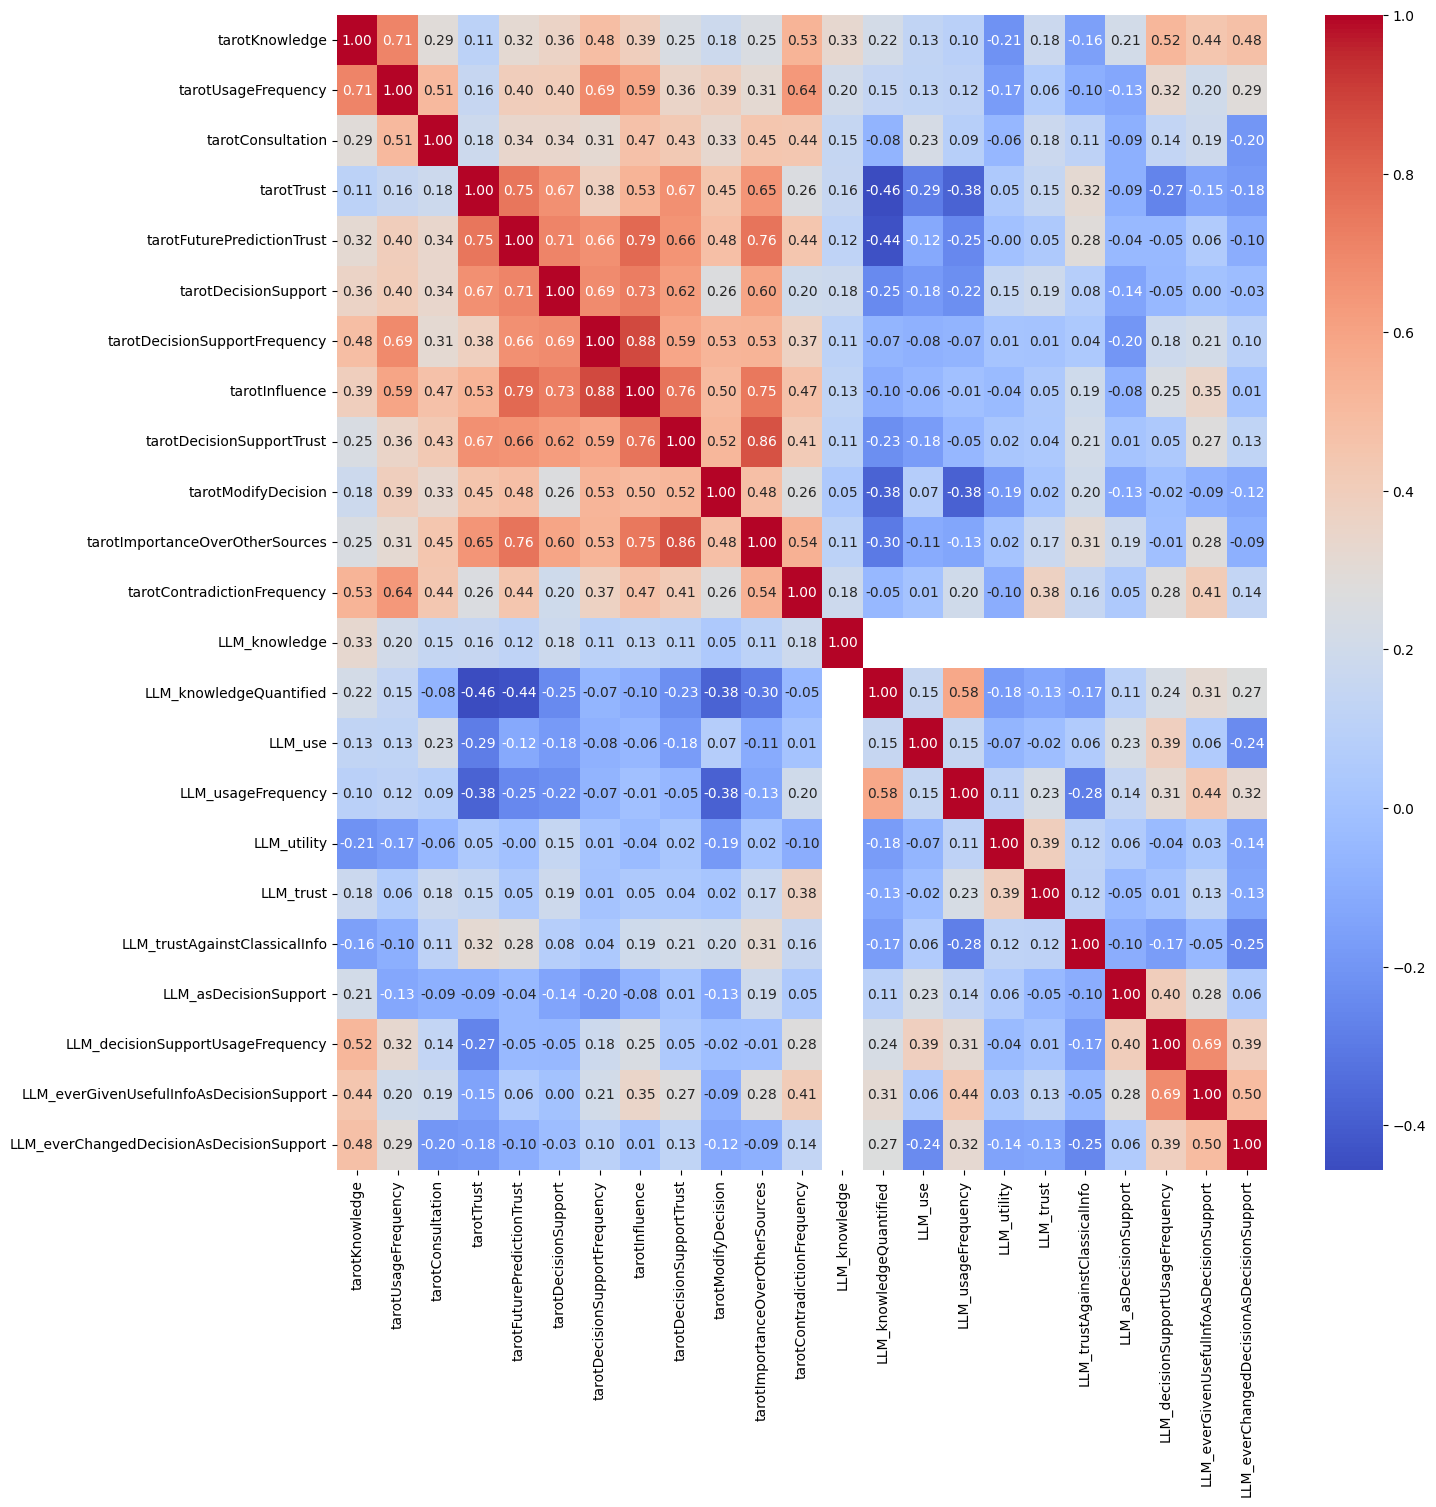

In [40]:
# show correlation matrices in heatmaps
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix_spearman, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

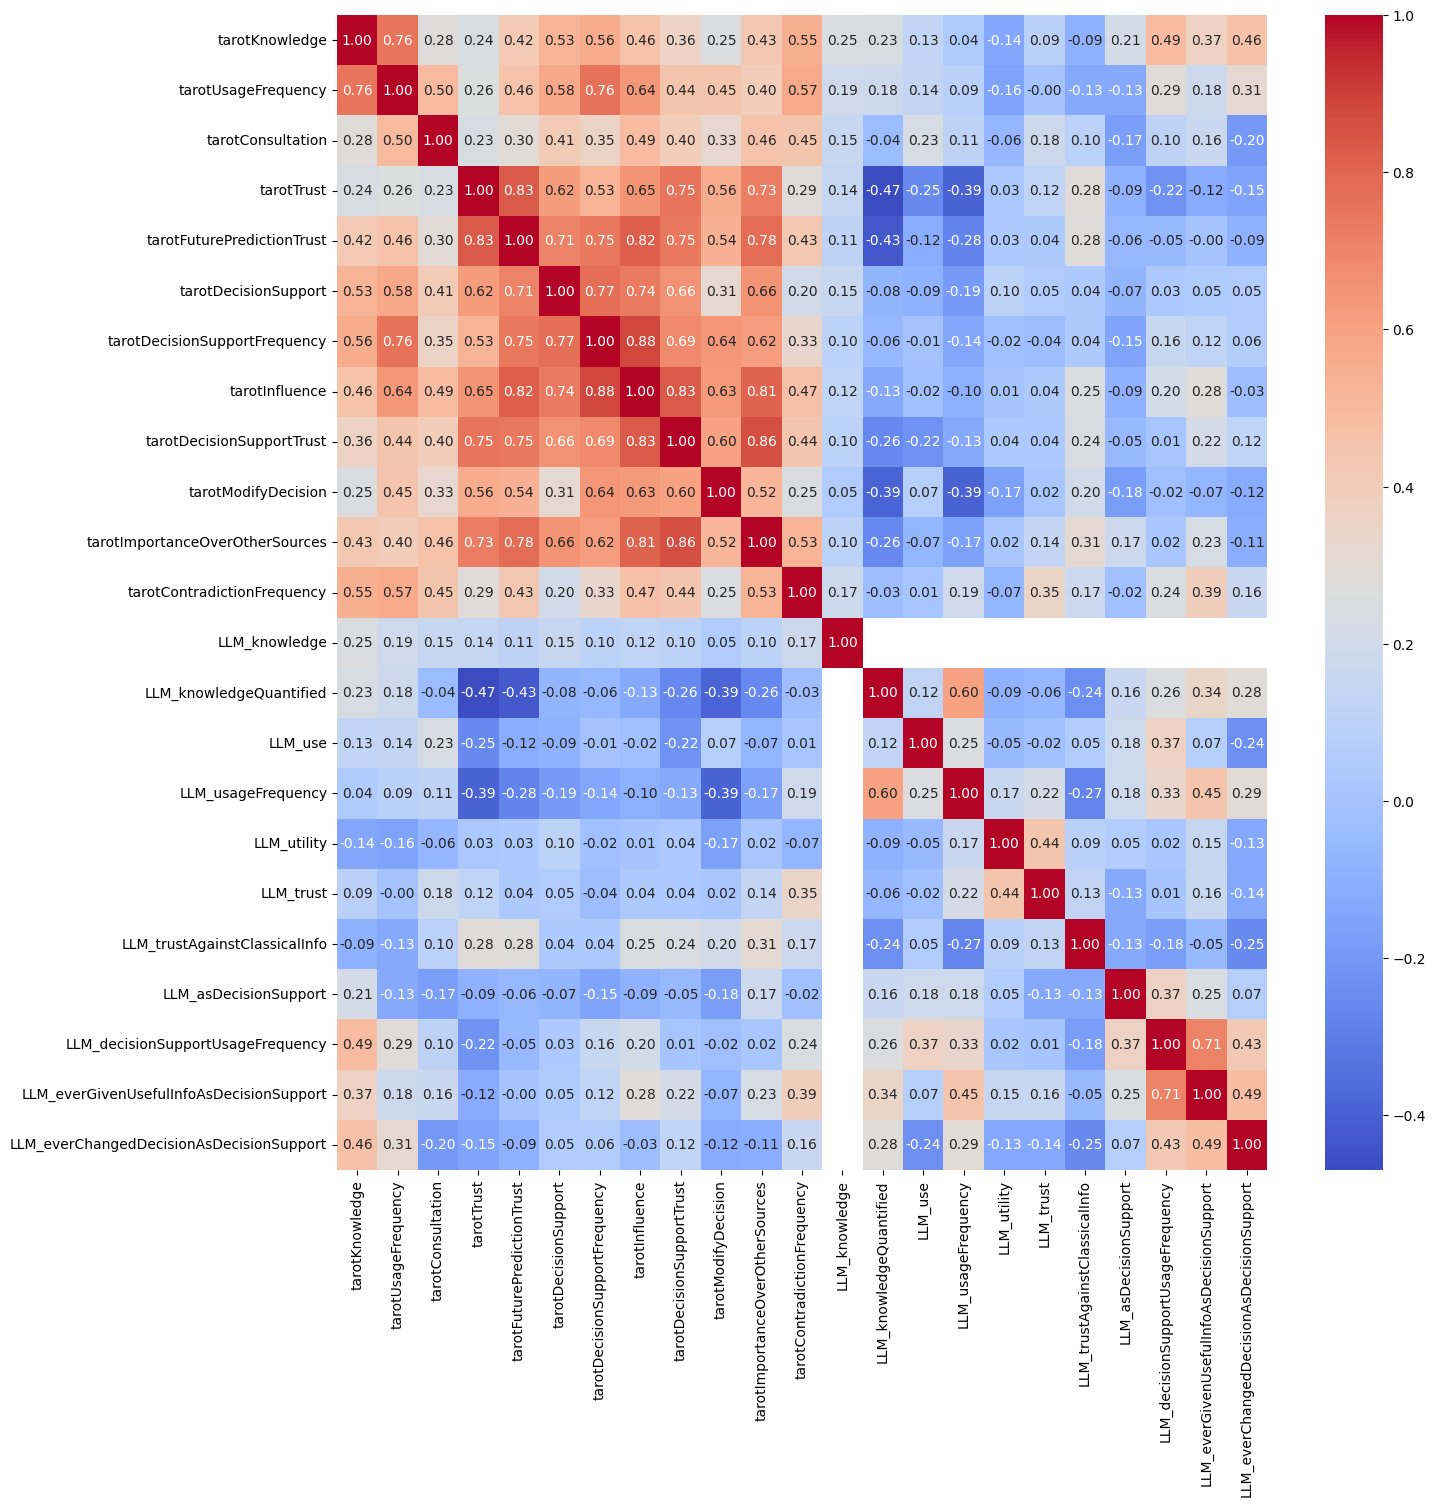

In [41]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix_pearson, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()